In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
banking_data = pd.read_csv("Assignment-2_Data.csv") 

In [3]:
#Checking first 5 records of the dataset
banking_data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#checking info
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


### Basic Dataset information
1. There are total 45,211 records (rows) and 18 attributes (columns) in the dataset
2. Out of 18 columns, 10 are of object datatype, 6 are of integer datatype, and 2 are of float datatype
3. Alos, we can see some columns have missing values.

In [5]:
#checking missing values
banking_data.isnull().sum()

Id            0
age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

### There are 12 missing values in age column, 1 missing value in Job column, and 3 missing values in balance column

## Imputing Missing Values

In [6]:
banking_data[banking_data["age"].isnull()]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
53,1054,NaN,admin.,single,secondary,no,-76.0,yes,no,unknown,5,may,787,1,-1,0,unknown,no
54,1055,NaN,technician,single,secondary,no,-103.0,yes,yes,unknown,5,may,145,1,-1,0,unknown,no
55,1056,NaN,entrepreneur,single,tertiary,no,243.0,no,yes,unknown,5,may,174,1,-1,0,unknown,no
56,1057,NaN,management,single,tertiary,no,424.0,yes,no,unknown,5,may,104,1,-1,0,unknown,no
57,1058,NaN,blue-collar,married,unknown,no,306.0,yes,no,unknown,5,may,13,1,-1,0,unknown,no
58,1059,NaN,blue-collar,single,unknown,no,24.0,yes,no,unknown,5,may,185,1,-1,0,unknown,no


In [7]:
index_null = banking_data[banking_data["age"].isnull()].index  #extracting index values to check the values after imputation
index_null

Index([0, 1, 2, 7, 53, 54, 55, 56, 57, 58, 59, 60], dtype='int64')

In [8]:
## imputing missing values
banking_data[banking_data["marital"] == "married"]["age"].mean().round(2)  #average age of married people in the dataset

43.41

In [9]:
banking_data[banking_data["marital"] == "single"]["age"].mean().round(2) #average age of single people in the dataset

33.7

In [10]:
banking_data[banking_data["marital"] == "divorced"]["age"].mean().round(2) #average age of divorced people in the dataset

45.78

### We can use marital status column to fill missing values for age column. As we can see, average age of people with single status is 33 years, while average age of people who are married or divorced is above 40 years.

In [11]:
# Imputing missing values for age column
conditions = [((banking_data["marital"] == "married") & (banking_data["age"].isnull())),
             ((banking_data["marital"] == "single") & (banking_data["age"].isnull())),
             ((banking_data["marital"] == "divorced") & (banking_data["age"].isnull()))]

choices = [banking_data[banking_data["marital"] == "married"]["age"].mean().round(2),
          banking_data[banking_data["marital"] == "single"]["age"].mean().round(2),
          banking_data[banking_data["marital"] == "divorced"]["age"].mean().round(2)]

banking_data["age"] = np.select(conditions,choices,default = banking_data["age"])

In [12]:
banking_data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,43.41,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,33.70,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,43.41,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.00,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.00,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
#checking imputed values
banking_data.iloc[index_null]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,43.41,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,33.70,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,43.41,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
7,1008,45.78,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
53,1054,33.70,admin.,single,secondary,no,-76.0,yes,no,unknown,5,may,787,1,-1,0,unknown,no
54,1055,33.70,technician,single,secondary,no,-103.0,yes,yes,unknown,5,may,145,1,-1,0,unknown,no
55,1056,33.70,entrepreneur,single,tertiary,no,243.0,no,yes,unknown,5,may,174,1,-1,0,unknown,no
56,1057,33.70,management,single,tertiary,no,424.0,yes,no,unknown,5,may,104,1,-1,0,unknown,no
57,1058,43.41,blue-collar,married,unknown,no,306.0,yes,no,unknown,5,may,13,1,-1,0,unknown,no
58,1059,33.70,blue-collar,single,unknown,no,24.0,yes,no,unknown,5,may,185,1,-1,0,unknown,no


In [14]:
banking_data[banking_data["job"].isnull()]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1002,33.7,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [15]:
banking_data[(banking_data["education"] == "secondary") & (banking_data["marital"] == "single")]["job"].value_counts()

job
technician       1636
admin.           1376
blue-collar      1312
services         1014
student           487
management        294
unemployed        189
self-employed     112
entrepreneur       72
housemaid          55
retired            45
unknown            24
Name: count, dtype: int64

In [16]:
banking_data["job"].fillna("technician",inplace=True) #we are imputing missing value with the most common job type with the education background as secondary 

In [17]:
banking_data[banking_data["balance"].isnull()]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,1008,45.78,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.00,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.00,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [18]:
banking_data[banking_data["age"] > 42]["balance"].mean()

1630.1399855225793

In [19]:
banking_data[banking_data["education"].isin(["primary","secondary","tertiary"])]["balance"].mean()

1355.303983760467

In [20]:
imputation_value = banking_data[(banking_data["age"] > 42) & (banking_data["education"].isin(["primary","secondary","tertiary"]))]["balance"].mean().round(2)

In [21]:
banking_data["balance"].fillna(imputation_value,inplace=True)

In [22]:
banking_data.iloc[[7,8,9]]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,1008,45.78,entrepreneur,divorced,tertiary,yes,1622.03,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.00,retired,married,primary,no,1622.03,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.00,technician,single,secondary,no,1622.03,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Descriptive Statistics

In [23]:
banking_data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.933048,1362.363851,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.622122,3044.752096,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Here we can see the five point summary of the numeric columns.We can see the basic descriptive statistics like average, median, minimum value, maximum value. 

In [24]:
banking_data.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Here we can see the count, frequency, and unique values in each column of object datatype

In [25]:
job_group = banking_data.groupby("job")

In [26]:
for job_type in banking_data["job"].unique():
    print(f"Group name: {job_type.upper()}")
    print(job_group.get_group(job_type)["education"].value_counts())
    print()

Group name: MANAGEMENT
education
tertiary     7801
secondary    1121
primary       294
unknown       242
Name: count, dtype: int64

Group name: TECHNICIAN
education
secondary    5229
tertiary     1968
unknown       242
primary       158
Name: count, dtype: int64

Group name: ENTREPRENEUR
education
tertiary     686
secondary    542
primary      183
unknown       76
Name: count, dtype: int64

Group name: BLUE-COLLAR
education
secondary    5371
primary      3758
unknown       454
tertiary      149
Name: count, dtype: int64

Group name: UNKNOWN
education
unknown      127
secondary     71
primary       51
tertiary      39
Name: count, dtype: int64

Group name: RETIRED
education
secondary    984
primary      795
tertiary     366
unknown      119
Name: count, dtype: int64

Group name: ADMIN.
education
secondary    4219
tertiary      572
primary       209
unknown       171
Name: count, dtype: int64

Group name: SERVICES
education
secondary    3457
primary       345
tertiary      202
unknown   

In [27]:
for job_type in banking_data["job"].unique():
    print(f"Group name: {job_type.upper()}")
    print(job_group.get_group(job_type)["balance"].mean())
    print()

Group name: MANAGEMENT
1763.6168323112709

Group name: TECHNICIAN
1252.7675437672767

Group name: ENTREPRENEUR
1522.5595359784804

Group name: BLUE-COLLAR
1078.8266543362104

Group name: UNKNOWN
1772.357638888889

Group name: RETIRED
1984.878105123675

Group name: ADMIN.
1135.838909301876

Group name: SERVICES
997.0881078478575

Group name: SELF-EMPLOYED
1647.9708676377454

Group name: UNEMPLOYED
1521.7459708365311

Group name: HOUSEMAID
1392.3951612903227

Group name: STUDENT
1388.0607675906183



In [28]:
banking_data["job"].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [29]:
#Replacing common job-type in the jobs column. Also replacing unknown value to entrepreneur, since their average balance is close to entrepreneur group
banking_data["job"] = banking_data["job"].replace({"self-employed":"entrepreneur","technician":"blue-collar","housemaid":"blue-collar","services":"blue-collar","unknown":"entrepreneur"})

In [30]:
#Re-checking the column
banking_data["job"].value_counts()

job
blue-collar     22723
management       9458
admin.           5171
entrepreneur     3354
retired          2264
unemployed       1303
student           938
Name: count, dtype: int64

In [31]:
#same way we will fill unknown column in education. Now most of the entrepreneur have tertiary education listed.

banking_data["education"] = banking_data["education"].replace({"unknown":"tertiary"})

In [32]:
banking_data["education"].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

#### In age column, we have seen that the minimum age is -1, which is not possible. So we will remove the outliers.

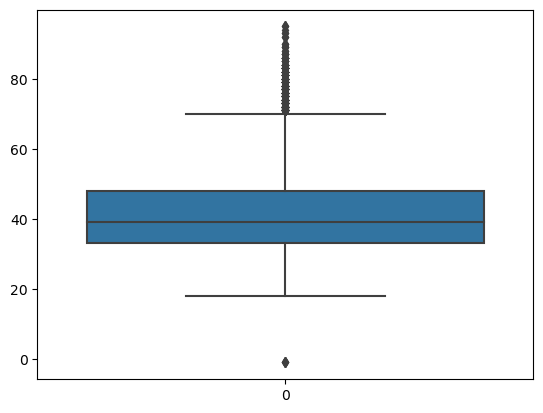

In [33]:
sns.boxplot(banking_data["age"]);

In [34]:
banking_data["age"].max()

95.0

In [35]:
def find_caping_values(arr):
    q1, q3 = np.percentile(arr,q = [25,75])
    IQR = q3 - q1
    upper_limit = q3+(1.5*IQR)
    lower_limit = q1-(1.5*IQR)
    
    return upper_limit, lower_limit

In [36]:
upper_value, lower_value = find_caping_values(banking_data["age"])

In [37]:
banking_data["age"] = np.where(banking_data["age"] > upper_value,upper_value,banking_data["age"])
banking_data["age"] = np.where(banking_data["age"] < lower_value,lower_value,banking_data["age"])

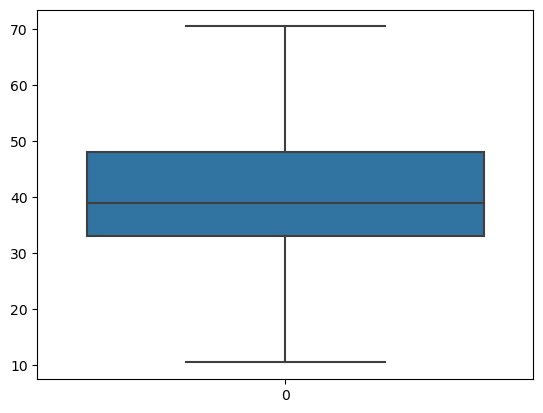

In [38]:
sns.boxplot(banking_data["age"]);

### Now that we have cleaned our data, let's answer some common questions

In [39]:
# Let's see the percentage of people have taken loan.
banking_data["loan"].value_counts(normalize=True)

loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64

In [40]:
# Let's see the percentage of people have taken housing loan.
banking_data["housing"].value_counts(normalize=True)

housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64

In [41]:
#### who generally takes loan

banking_data[banking_data['loan'] == 'yes'].groupby('job')['loan'].count().sort_values(ascending=False)

job
blue-collar     3981
management      1253
admin.           991
entrepreneur     589
retired          309
unemployed       109
student           12
Name: loan, dtype: int64

In [42]:
banking_data[banking_data['housing'] == 'yes'].groupby('job')['housing'].count().sort_values(ascending=False)

job
blue-collar     14327
management       4678
admin.           3182
entrepreneur     1660
unemployed        543
retired           491
student           249
Name: housing, dtype: int64

In [43]:
# Let's see the percentage of people have taken loan.
banking_data["loan"].value_counts(normalize=True)

loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64

In [44]:
# What is the default ratio
banking_data["default"].value_counts(normalize=True)

default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

In [45]:
# which group has the most number of defaulters
banking_data[banking_data["default"] == "yes"].groupby("job")["default"].count().sort_values(ascending = False)

job
blue-collar     428
management      164
entrepreneur     90
admin.           74
unemployed       30
retired          26
student           3
Name: default, dtype: int64

In [46]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
banking_data["age_group"] = pd.cut(banking_data["age"],bins)

In [47]:
banking_data[banking_data["loan"] == "yes"].groupby("age_group")["loan"].count().sort_values(ascending=False)

age_group
(30, 40]    2727
(40, 50]    1902
(50, 60]    1417
(20, 30]    1174
(60, 70]      17
(10, 20]       4
(70, 80]       3
(0, 10]        0
Name: loan, dtype: int64

In [48]:
banking_data[banking_data["housing"] == "yes"].groupby("age_group")["housing"].count().sort_values(ascending=False)

age_group
(30, 40]    11234
(40, 50]     6381
(20, 30]     4036
(50, 60]     3384
(60, 70]       70
(10, 20]       13
(70, 80]       12
(0, 10]         0
Name: housing, dtype: int64

In [50]:
# we have many accounts that have negative balance. This means that they are dormant accounts
banking_data[banking_data["balance"] < 0]   #There are total 3766 dormant accounts.

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
25,1026,44.0,admin.,married,secondary,no,-372.0,yes,no,unknown,5,may,172,1,-1,0,unknown,no,"(40, 50]"
28,1029,46.0,management,single,secondary,no,-246.0,yes,no,unknown,5,may,255,2,-1,0,unknown,no,"(40, 50]"
36,1037,25.0,blue-collar,married,secondary,no,-7.0,yes,no,unknown,5,may,365,1,-1,0,unknown,no,"(20, 30]"
37,1038,53.0,blue-collar,married,secondary,no,-3.0,no,no,unknown,5,may,1666,1,-1,0,unknown,no,"(50, 60]"
45,1046,36.0,admin.,single,primary,no,-171.0,yes,no,unknown,5,may,242,1,-1,0,unknown,no,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,45627,31.0,blue-collar,single,secondary,no,-205.0,no,no,cellular,1,sep,481,1,579,1,failure,yes,"(30, 40]"
44629,45630,28.0,blue-collar,single,secondary,no,-46.0,yes,no,cellular,1,sep,199,1,92,14,success,yes,"(20, 30]"
44836,45837,33.0,blue-collar,married,primary,no,-195.0,no,no,unknown,20,sep,9,1,-1,0,unknown,no,"(30, 40]"
44908,45909,48.0,management,divorced,tertiary,no,-130.0,yes,no,cellular,29,sep,110,2,61,9,failure,no,"(40, 50]"


In [51]:
#Let's check bank is missing contacts for how many customers
banking_data["contact"].value_counts()   #Bank doesn't have basic contact information for more than 13000 accounts

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

#### ========================================== END =============================================== 